## Clase 19 - Machine Learning -------------------------------------
### 25-04-2024 ---------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
pd.__version__  # Verificamos la versión de pandas

'2.2.2'

In [3]:
np.__version__  # Verificamos la versión de numpy

'1.26.4'

In [4]:
tf.__version__  # Verificamos la versión de tensorflow

'2.16.1'

In [5]:
sns.__version__  # Verificamos la versión de seaborn

'0.13.2'

### Cargamos el dataset de diabetes ------------------------------
Creamos un modelo de red neuronal para predecir si una persona tiene diabetes o no, basándonos en ciertas características.

In [6]:
!ls ../auxiliares/datasets/diabetes/diabetes.csv # Verificamos que el archivo existe
data = pd.read_csv('../auxiliares/datasets/diabetes/diabetes.csv')  # Cargamos el archivo
data.head()  # Mostramos los primeros registros

../auxiliares/datasets/diabetes/diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
type(data)  # Verificamos el tipo de objeto

pandas.core.frame.DataFrame

In [8]:
data.corr()['Outcome']  # Calculamos la correlación con el resultado

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [9]:
data.info()  # Verificamos la información del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data.shape  # Verificamos la forma del dataset (registros, columnas)

(768, 9)

In [11]:
# --- Dado que el dataset no tiene valores nulos, no hay necesidad de limpiar los datos ------------

In [12]:
X = data.iloc[:, :-1].values  # Variables independientes
y = data.iloc[:, -1].values  # Variable dependiente

In [13]:
X.shape  # Verificamos la forma de X

(768, 8)

In [14]:
y.shape  # Verificamos la forma de y

(768,)

In [15]:
from sklearn.preprocessing import StandardScaler
import sklearn

sklearn.__version__  # Verificamos la versión de sklearn

'1.4.2'

In [16]:
# Cuando se usan redes neuronales, los datos deben ser normalizados, porque las escalas si no son distintas.
normalizador = StandardScaler()  # Instanciamos el normalizador

In [17]:
X = normalizador.fit_transform(X)  # Normalizamos los datos

In [18]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [19]:
X_train.shape  # Verificamos la forma de X_train

(460, 8)

In [20]:
y_train.shape  # Verificamos la forma de y_train

(460,)

In [21]:
np.random.seed(150)  # Fijamos la semilla para reproducibilidad
tf.random.set_seed(150)  # Fijamos la semilla para reproducibilidad

In [22]:
def build_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1],)))  # Use Input layer
    model.add(tf.keras.layers.Dense(16, activation="relu"))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(8, activation="relu"))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(4, activation="relu"))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [23]:
model = build_model()  # Creamos el modelo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Entrenamos el modelo con los datos de entrenamiento, validamos con los datos de prueba.
# Lo hacemos por 100 épocas, con un batch de 8 (cuanto más grande el batch, más rápido el entrenamiento)
# Los epochs son las veces que se va a iterar sobre el dataset, cuanto más grande, más tiempo de entrenamiento y mejor precisión.
# El batch es la cantidad de datos que se van a procesar en cada iteración, cuanto más grande, más rápido el entrenamiento.
# Usamos early stopping para evitar el overfitting.
# El early stopping detiene el entrenamiento cuando la precisión en el conjunto de validación deja de mejorar.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=400, batch_size=7, validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/400
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5930 - loss: 0.7212 - val_accuracy: 0.6558 - val_loss: 0.6850
Epoch 2/400
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.7025 - loss: 0.7029 - val_accuracy: 0.6948 - val_loss: 0.6761
Epoch 3/400
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.6884 - loss: 0.6734 - val_accuracy: 0.6948 - val_loss: 0.6621
Epoch 4/400
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.6880 - loss: 0.6690 - val_accuracy: 0.7078 - val_loss: 0.6403
Epoch 5/400
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.6941 - loss: 0.6301 - val_accuracy: 0.7078 - val_loss: 0.6128
Epoch 6/400
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.6766 - loss: 0.6074 - val_accuracy: 0.7045 - val_loss: 0.5840
Epoch 7/400
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.7220 - loss: 0.5816 - val_accuracy: 0.7110 - val_loss: 0.5641
Epoch 8/400
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.6797 - loss: 0.5926 - val_accura

In [25]:
# Exportar el modelo
from datetime import datetime

# Guardar el modelo con la fecha y hora actual
model.save(f"../auxiliares/modelos/{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.keras")

In [26]:
import matplotlib.pyplot as plt


def plot_history(hist):  # Función para graficar la precisión del modelo
    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.plot(hist.epoch, hist.history["accuracy"], label="Training accuracy")
    plt.plot(hist.epoch, hist.history["val_accuracy"], label="Testing accuracy")
    plt.legend()
    plt.show()

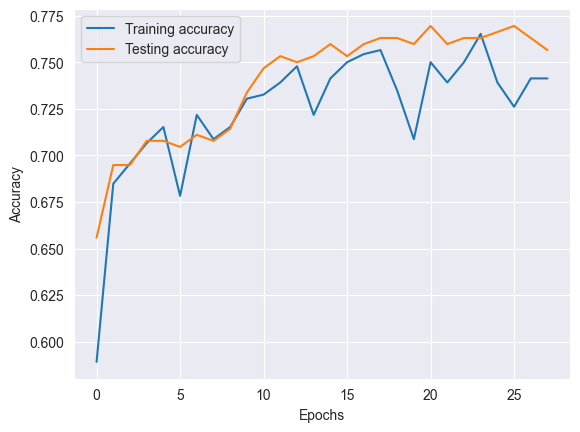

In [27]:
plot_history(history)  # Graficamos la precisión del modelo

In [28]:
model.evaluate(X_test, y_test)  # Evaluamos el modelo con los datos de prueba
model.name  # Mostramos el nombre del modelo

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7746 - loss: 0.4960 


'sequential'

In [29]:
# Cargamos un modelo desde un archivo
model_2 = tf.keras.models.load_model('../auxiliares/modelos/2024-04-28_17-14-54.keras')

In [30]:
model_2.evaluate(X_test, y_test)  # Evaluamos el modelo cargado
model_2.name  # Mostramos el nombre del modelo

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.7867 - loss: 0.4738


'sequential_3'

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


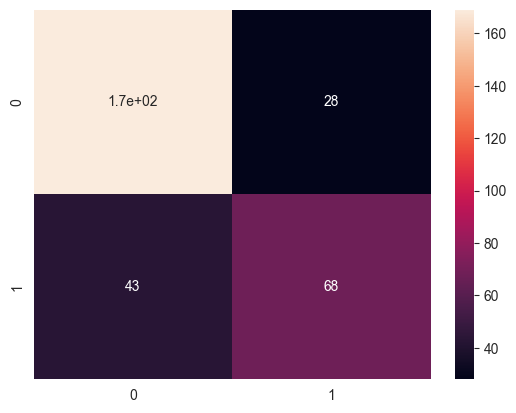

In [31]:
# Graficar la matriz de confusión de los dos modelos
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)  # Predecimos con el modelo 1
y_pred = (y_pred > 0.5)  # Convertimos las probabilidades en valores binarios
cm = confusion_matrix(y_test, y_pred)  # Calculamos la matriz de confusión
sns.heatmap(cm, annot=True)  # Graficamos la matriz de confusión
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


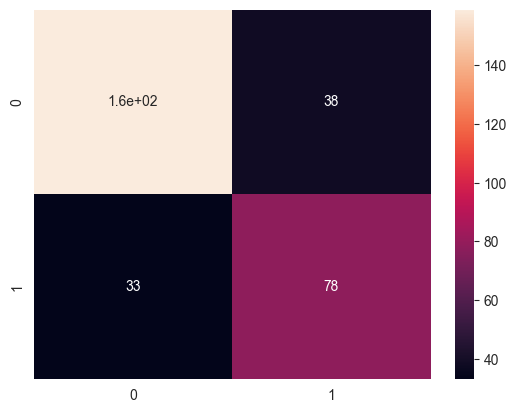

In [32]:
y_pred_2 = model_2.predict(X_test)  # Predecimos con el modelo 2
y_pred_2 = (y_pred_2 > 0.5)  # Convertimos las probabilidades en valores binarios
cm_2 = confusion_matrix(y_test, y_pred_2)  # Calculamos la matriz de confusión
sns.heatmap(cm_2, annot=True)  # Graficamos la matriz de confusión
plt.show()

### Cargamos el dataset de juegos olímpicos ------------------------
Extraemos y analizamos los datos de los juegos olímpicos.

In [33]:
olympics = pd.read_csv('../auxiliares/datasets/olympics/olympics.csv', delimiter=",", skiprows=4)  # Cargamos el dataset

In [34]:
olympics.head()  # Mostramos los primeros registros

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [35]:
olympics.info()  # Verificamos la información del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


In [36]:
len(olympics.Sport == "Athletics")  # Verificamos la cantidad de registros

29216

In [37]:
len(olympics.Medal == "Gold")  # Verificamos la cantidad de registros

29216

In [38]:
# Filtramos los registros con medallas de oro
gold_medals = olympics[(olympics.Medal == 'Gold') & (olympics.Sport == 'Athletics')]

In [39]:
gold_medals.head()  # Mostramos los primeros registros

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
18,Athens,1896,Athletics,Athletics,"FLACK, Edwin",AUS,Men,1500m,M,Gold
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold
24,Athens,1896,Athletics,Athletics,"FLACK, Edwin",AUS,Men,800m,M,Gold


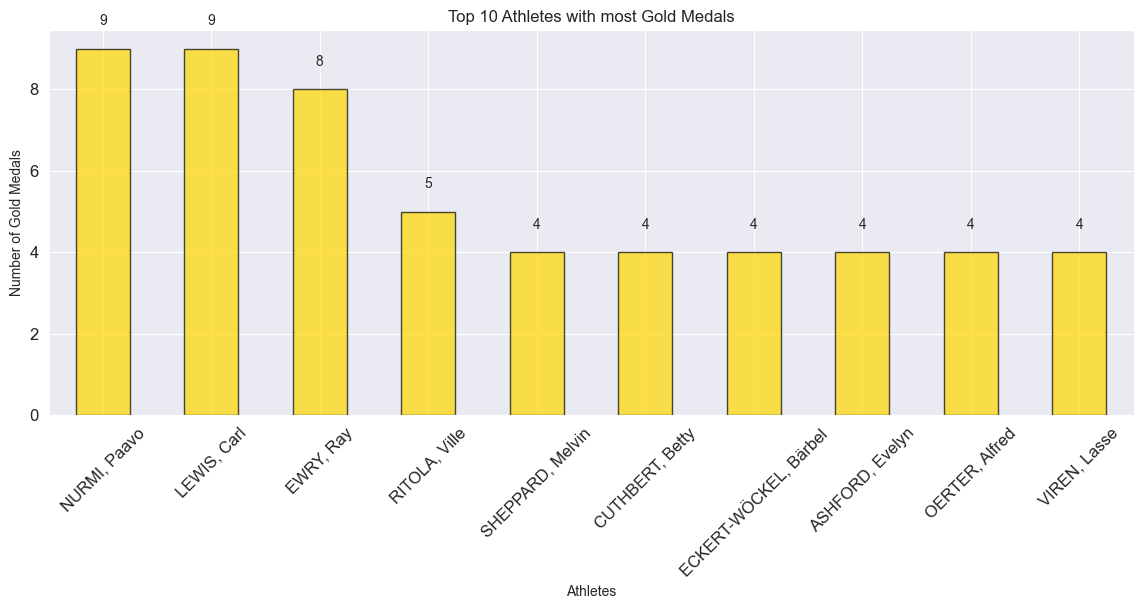

In [40]:
# Plot of the athletes with the most gold medals
athlete_counts = gold_medals.Athlete.value_counts().head(10)
ax = athlete_counts.plot(kind='bar', figsize=(14, 5), color='gold', alpha=0.7,
                         title='Top 10 Athletes with most Gold Medals',
                         linewidth=1, edgecolor='black',
                         ylabel='Number of Gold Medals', xlabel='Athletes', grid=True, rot=45,
                         fontsize=12)

# Add the value on top of each bar
for i, v in enumerate(athlete_counts):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.show()

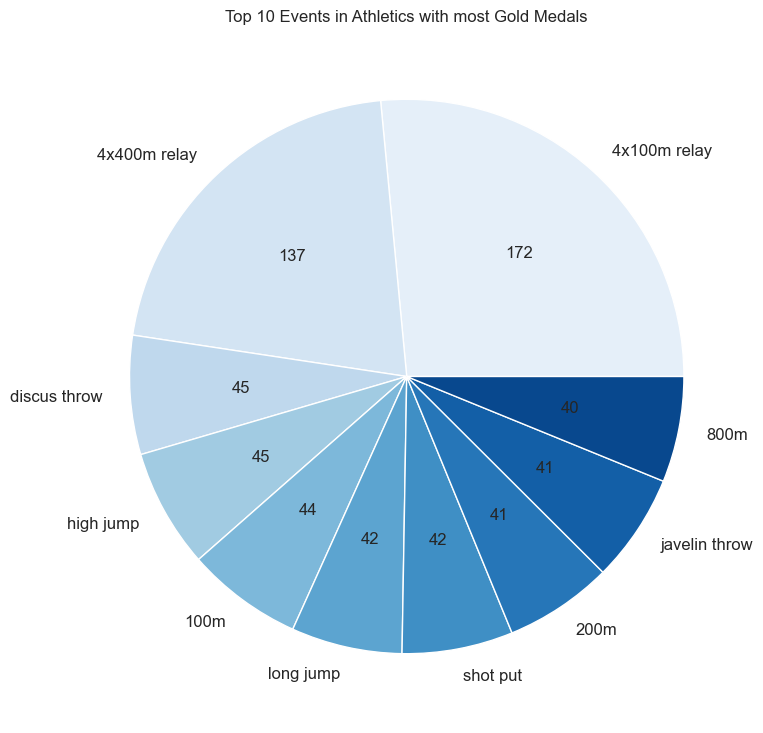

In [41]:
# Pie chart with medals per discipline
def absolute_value(val):
    a = np.round(val / 100. * gold_medals.Event.value_counts().head(10).sum(), 0)
    return int(a)


# Generate a palette of 10 different shades of blue
blue_palette = sns.color_palette("Blues", 10)

gold_medals.Event.value_counts().head(10).plot(kind='pie', figsize=(9, 9),
                                               title='Top 10 Events in Athletics with most Gold Medals',
                                               xlabel='Events',
                                               ylabel='',
                                               fontsize=12, autopct=absolute_value,
                                               colors=blue_palette)

plt.show()

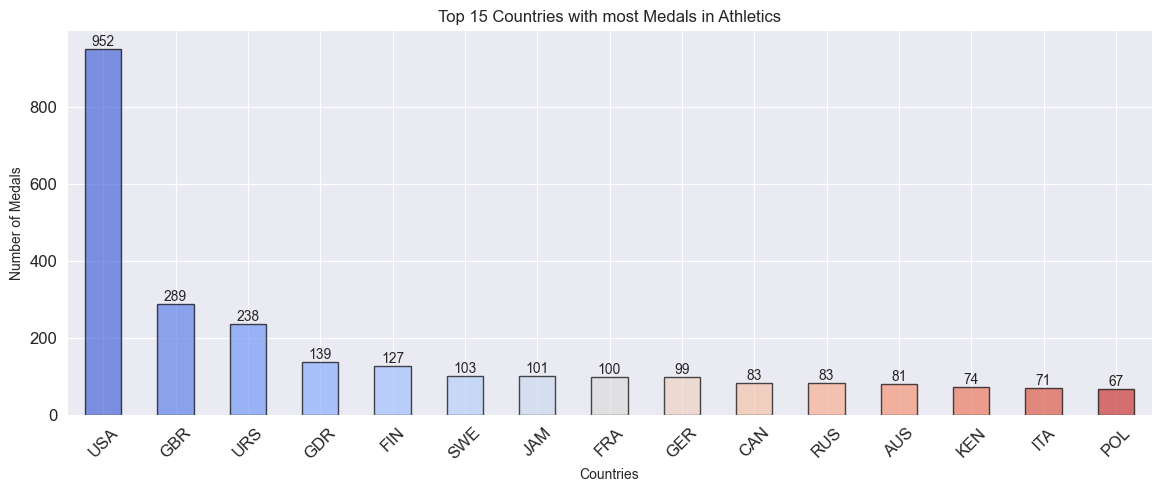

In [42]:
# Plot with the number of medals won by first 15 countries
# Filter the data
medals = olympics[(olympics.Sport == 'Athletics') & (olympics.Medal != 'No Medal')]

# Count the number of medals by country
medals_by_country = medals.NOC.value_counts().head(15)

# Create a color palette
palette = sns.color_palette("coolwarm", len(medals_by_country))

# Plot the data
ax = medals_by_country.plot(kind='bar', figsize=(14, 5), color=palette, alpha=0.7,
                            title='Top 15 Countries with most Medals in Athletics',
                            linewidth=1, edgecolor='black',
                            ylabel='Number of Medals', xlabel='Countries', grid=True, rot=45,
                            fontsize=12)

# Add the value on top of each bar
for i, v in enumerate(medals_by_country):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.show()